# Bike Sharing Demand Analysis

**Prashant Brahmbhatt**  
prashant.brahmbhatt32@outlook.com

### About Data

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### Data Fields

**datetime**: hourly + timestamp  
**season**:  
        1 ---- spring  
        2 ---- summer  
        3 ---- fall  
        4 ---- Winter  

**holiday**:  
whether the day is holiday or not  

**workingday**:  
true means day is other than weekend or holiday  

**weather**:  
1--- Clear, Few clouds, Partly cloudy, Partly cloudy  
2--- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3--- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4--- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
      
**temp**:  
temperature in celsius  

**atemp**:  
feels like temperature  

**humidity**:  
relative humidity  

**windspeed**:  
the windspeed

**casuals**:  
No. of non registered users   

**registered**:
No. of registered users

**count**:  
no. of total rentals

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
df.shape

(10886, 12)

In [6]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

## Feature Engineering

Extracting data from **datetime** column in different columns

Since the datetime is in **object** form or **string** we convert it first to **datetime** object.  

In [7]:
df['dates_parsed']  = pd.to_datetime(df['datetime'])

In [8]:
df.dtypes

datetime                object
season                   int64
holiday                  int64
workingday               int64
weather                  int64
temp                   float64
atemp                  float64
humidity                 int64
windspeed              float64
casual                   int64
registered               int64
count                    int64
dates_parsed    datetime64[ns]
dtype: object

Since new parsed column is formed from original.  
Now we extract information easily.

In [9]:
df['date'] = df['dates_parsed'].dt.date
df['hour'] = df['dates_parsed'].dt.hour
df['dayname'] = df['dates_parsed'].dt.weekday
df['month'] = df['dates_parsed'].dt.month

In [10]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dates_parsed,date,hour,dayname,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011-01-01,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011-01-01,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011-01-01,4,5,1


We can observe that **dayname** and **month** are unmapped integers so we will map. With 0 as Monday and 6 as Sunday.  
And Months as usual

### Mapping the columns
**dayname**, **month**, **season** and **weather**

In [11]:
df['dayname'] = df['dayname'].map({0:'Monday', 1:'Tuesday', 2: 'Wednesday', 3: 'Thrusday', 4:'Friday', 5: 'Saturday', 6: 'Sunday'})
df['month'] = df['month'].map({1:'January', 2:'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July',
                              8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
df['season'] = df['season'].map({1:'Spring', 2:'Summer', 3: 'Fall', 4: 'Winter'})
df['weather'] = df['weather'].map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dates_parsed,date,hour,dayname,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01 00:00:00,2011-01-01,0,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01 01:00:00,2011-01-01,1,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01 02:00:00,2011-01-01,2,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01 03:00:00,2011-01-01,3,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01 04:00:00,2011-01-01,4,Saturday,January


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime        10886 non-null object
season          10886 non-null object
holiday         10886 non-null int64
workingday      10886 non-null int64
weather         10886 non-null object
temp            10886 non-null float64
atemp           10886 non-null float64
humidity        10886 non-null int64
windspeed       10886 non-null float64
casual          10886 non-null int64
registered      10886 non-null int64
count           10886 non-null int64
dates_parsed    10886 non-null datetime64[ns]
date            10886 non-null object
hour            10886 non-null int64
dayname         10886 non-null object
month           10886 non-null object
dtypes: datetime64[ns](1), float64(3), int64(7), object(6)
memory usage: 1.4+ MB


We can see that our columns are not as categorical variables so we change their datatypes

In [14]:
variableList = ["hour","dayname","month","season","weather","holiday","workingday"]
for var in variableList:
    df[var] = df[var].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
datetime        10886 non-null object
season          10886 non-null category
holiday         10886 non-null category
workingday      10886 non-null category
weather         10886 non-null category
temp            10886 non-null float64
atemp           10886 non-null float64
humidity        10886 non-null int64
windspeed       10886 non-null float64
casual          10886 non-null int64
registered      10886 non-null int64
count           10886 non-null int64
dates_parsed    10886 non-null datetime64[ns]
date            10886 non-null object
hour            10886 non-null category
dayname         10886 non-null category
month           10886 non-null category
dtypes: category(7), datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 927.1+ KB


#### Dropping unnecessary columns

In [16]:
df.drop(['datetime','dates_parsed'], axis= 1, inplace= True)

In [17]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,dayname,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,2,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,3,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,4,Saturday,January


#### Looking for Missing Values

I prefer to use heatmap to look for density of missing values.

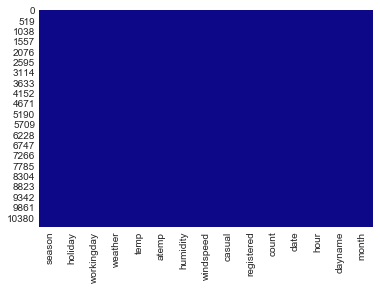

In [18]:
sns.heatmap(df.isnull(), cbar = False, cmap = 'plasma')

We have no missing values.

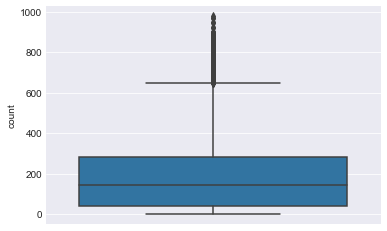

In [19]:
sns.boxplot(x = df['count'], orient = 'v')

We can observe that the distribution for variable **count** is skewed right and contains a lot of outliers.

Now we observe distribution of **count** respective to other factors.

[Text(0,0,'Saturday'),
 Text(1,0,'Sunday'),
 Text(2,0,'Monday'),
 Text(3,0,'Tuesday'),
 Text(4,0,'Wednesday'),
 Text(5,0,'Thrusday'),
 Text(6,0,'Friday')]

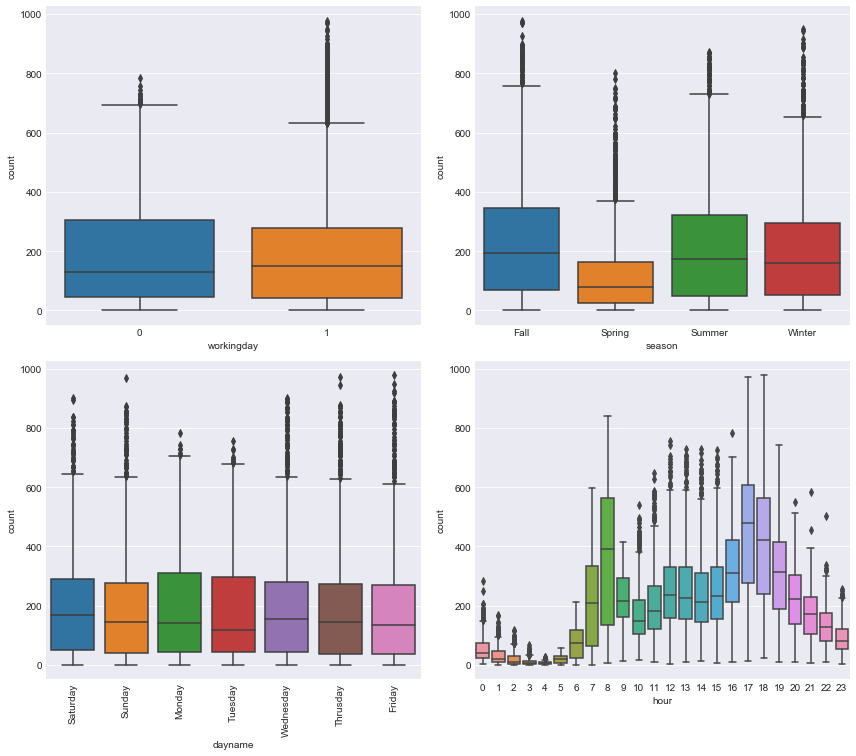

In [20]:
fig, axes = plt.subplots(nrows= 2, ncols= 2)
fig.set_size_inches(12,10)
sns.boxplot(y = 'count', x = 'hour', data = df, ax = axes[1][1])
f = sns.boxplot(y = 'count', x = 'dayname', data = df, ax = axes[1][0])
sns.boxplot(y = 'count', x = 'season', data = df, ax = axes [0][1])
sns.boxplot(y = 'count', x = 'workingday', data = df, ax = axes [0][0])
plt.tight_layout()
f.set_xticklabels(labels = df['dayname'].unique(), rotation = 90)

### Observations

From the above box plots we can make the following conclusions:
* The rentals get lowered during spring season.
* The values at peak hours morning and evening are higher as likely to be
* The outlier count in 'non working day' is quite higher.
* Not much unusual activity on weekdays or weekends

## Elimination of Count Outliers

We know that **outliers** are the datapoints in data having values **3 standard deviation above and below mean**.  
Here we only have higher outliers.

In [21]:
df_wo = df[np.abs(df["count"]-df["count"].mean())<=(3*df["count"].std())]

New shape of data

In [22]:
df_wo.shape

(10739, 15)

## Analysis through Matrix Plots

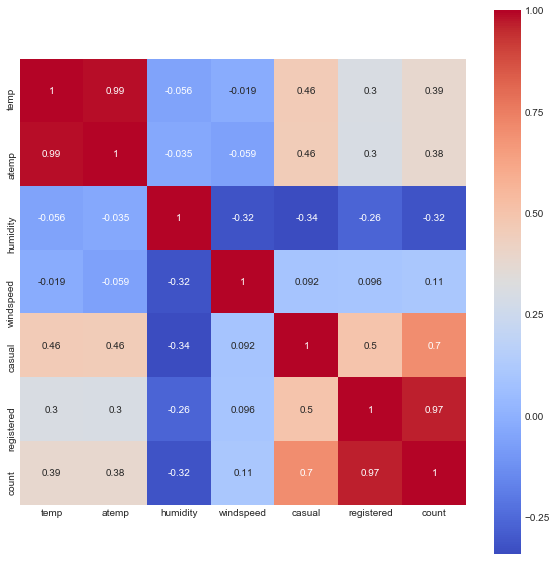

In [23]:
plt.figure(figsize = (10,10))
sns.heatmap(df_wo.corr(),annot= True, cmap= 'coolwarm', square = True)

### Observations

* Temperature has a positive correlation in considerable amount.
* atemp is not taken since it has a strong correlation with temp and will lead to multi collinearity.
* Humidity also has a sufficient negative correlation for dependency.
* Windspeed has negligible effect on our variable
* Registered and casual will not be considered since they themselves sum up as count

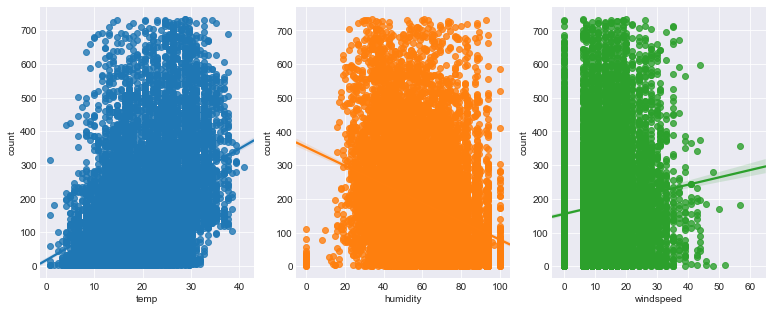

In [24]:
fig, axes = plt.subplots(nrows= 1, ncols= 3)
fig.set_size_inches(13,5)
#Here we use regplot rather than lmplot because lmplot do not support ax argument
sns.regplot(x = 'temp', y = 'count', data = df_wo, ax =  axes[0])
sns.regplot(x = 'humidity', y = 'count', data = df_wo, ax =  axes [1])
sns.regplot(x = 'windspeed', y = 'count', data = df_wo, ax =  axes [2])

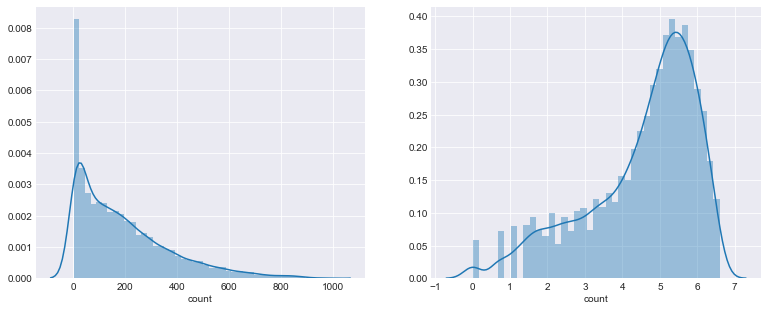

In [25]:
fig, (ax1,ax2) = plt.subplots(ncols= 2)
fig.set_size_inches(13,5)
sns.distplot(df['count'], ax = ax1)
sns.distplot(np.log(df_wo['count']), ax = ax2)

We can observe that the initial left distribution is *Right Skewed*. SInce most of the statistics assume the dependent data variable to be normal. So we need to normalize it.
We already removed the outliers and we can use **log** for normalizing.

It is still not quite normal yet (right figure).

## Additional Analysis

Text(0.5,1,'Count as per hour based on each Day')

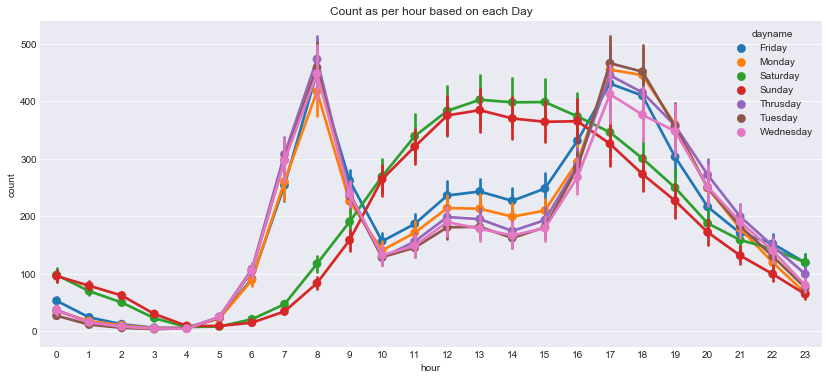

In [26]:
plt.figure(figsize = (14,6))
x = sns.pointplot(x= df_wo['hour'], y = df_wo['count'], hue = df_wo['dayname'])
x.set_title('Count as per hour based on each Day')

**We can observe that during weekends the peak time for count are changed. From morning (around 8AM), evening (5-6PM) to morning (10AM), evening (5-6PM).**


Text(0.5,1,'Count as per hour based on each Season')

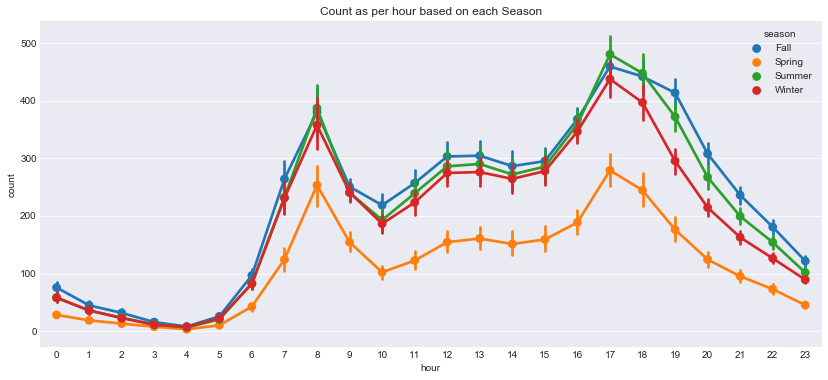

In [27]:
plt.figure(figsize = (14,6))
x = sns.pointplot(x= df_wo['hour'], y = df_wo['count'], hue = df_wo['season'])
x.set_title('Count as per hour based on each Season')

**From above plot, we can here confirm our previous observation of relatively lower rental counts during spring season.**

In [28]:
byMonth = pd.DataFrame(df_wo.groupby('month').mean().reset_index())
byMonth = byMonth.sort_values('count')
byMonth.head()

,month,temp,atemp,humidity,windspeed,casual,registered,count
4,January,9.840000,12.077579,55.911765,14.582959,8.203620,82.162896,90.366516
3,February,11.798535,14.532608,56.296337,13.963707,10.318535,99.684795,110.003330
7,March,15.849677,18.961823,56.751394,15.384933,27.420290,117.978818,145.399108
2,December,13.818352,17.103225,68.405495,10.668601,16.082418,158.267033,174.349451
0,April,18.644499,22.219738,56.004454,15.583745,42.975501,134.037862,177.013363


Text(0.5,1,'Average count as per month')

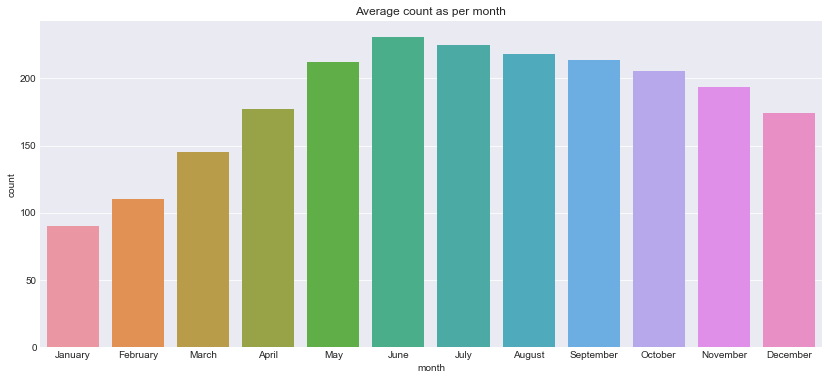

In [29]:
plt.figure(figsize = (14,6))
x = sns.barplot(data = byMonth, x = 'month', y = 'count', order= df['month'].unique())
x.set_title('Average count as per month')

**from above most counts can be observed during summer and fall**

In [30]:
byHour = pd.melt(df_wo[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])

In [31]:
byHour.head()

,hour,variable,value
0,0,casual,3
1,1,casual,8
2,2,casual,5
3,3,casual,3
4,4,casual,0


Text(0.5,1,'Count as per hour based on Casual and Registered uers')

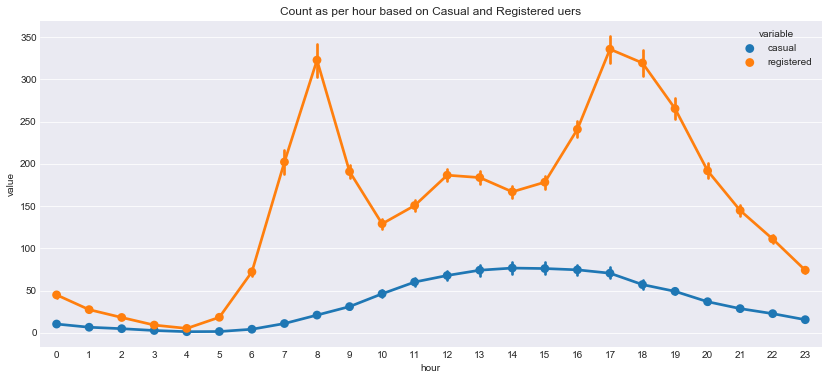

In [32]:
plt.figure(figsize = (14,6))
x = sns.pointplot(data = byHour, x = byHour['hour'], y = byHour['value'], hue = 'variable')
x.set_title('Count as per hour based on Casual and Registered uers')

**From above we can observe that weekday peak times are almost entirely due to registered users**

### Analysis Complete!

## Model Building

### Combining and Modifying data

In [33]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df = df_train.append(df_test)

In [34]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [35]:
df['hour'] = df['datetime'].dt.hour
df['dayname'] = df['datetime'].dt.weekday
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

In [36]:
df.head(1)

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,hour,dayname,month,year
0,14.395,3.0,16.0,2011-01-01,0,81,13.0,1,9.84,1,0.0,0,0,5,1,2011


### Identifying features

In [37]:
categorical = ["hour","dayname","month","season","weather","holiday","workingday",'year']
for var in categorical:
    df[var] = df[var].astype('category')

In [38]:
df.head(1)

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday,hour,dayname,month,year
0,14.395,3.0,16.0,2011-01-01,0,81,13.0,1,9.84,1,0.0,0,0,5,1,2011


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 6492
Data columns (total 16 columns):
atemp         17379 non-null float64
casual        10886 non-null float64
count         10886 non-null float64
datetime      17379 non-null datetime64[ns]
holiday       17379 non-null category
humidity      17379 non-null int64
registered    10886 non-null float64
season        17379 non-null category
temp          17379 non-null float64
weather       17379 non-null category
windspeed     17379 non-null float64
workingday    17379 non-null category
hour          17379 non-null category
dayname       17379 non-null category
month         17379 non-null category
year          17379 non-null category
dtypes: category(8), datetime64[ns](1), float64(6), int64(1)
memory usage: 1.3 MB


### Splitting Data

Here we can split data based on the **count** column.
Since the **Train** data will will consist that column but **Test** data will not.

In [40]:
X_train = df[pd.notnull(df['count'])].sort_values(by = ['datetime'])
X_test = df[~pd.notnull(df['count'])].sort_values(by = ['datetime'])
y_train = X_train['count']
datetimecol = X_test['datetime'] # We will need this to form final submission DataFrame
log_y_train = np.log(y_train) #using log for making it normal as much possible

### Dropping features

In [41]:
dropFeatures = ['count','atemp','registered','casual','datetime']
X_train.drop(labels = dropFeatures, axis = 1, inplace = True)
X_test.drop(labels = dropFeatures, axis = 1, inplace = True)

### Root Mean Squared Log Error

In [42]:
def rmsle(real, predicted):
    sum = 0
    for i in range(len(predicted)):
        #checking for negative values
        if (predicted[i]<0) or (real[i]<0):
            continue
        p = np.log(predicted[i] + 1)
        r = np.log(real[i] + 1)
        sum = sum+((p-r)**2)
    return ((sum/len(predicted))**0.5)

In [75]:
from sklearn.metrics import make_scorer

In [76]:
rmsle_scorer = make_scorer(rmsle, greater_is_better= False)

### Using Simple Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression, Lasso

In [51]:
regressor = LinearRegression()

In [52]:
regressor.fit(X_train, np.log(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
y_pred = regressor.predict(X_train)

In [54]:
print(" RMSLE Error for Linear Regression:   "+ str(rmsle(np.exp(log_y_train), np.exp(y_pred))))

 RMSLE Error for Linear Regression:   1.0193077082236865


In [55]:
regressor.fit(X_train, np.log(y_train))
y_sub = regressor.predict(X_test)
y_sub = np.exp(y_sub)

### Using Lasso Regression

In [89]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [100]:
alphas = 1/np.array([1,2,3,4,5,10,100,200,300,500,900,1000]) #Here alpha is the Tuning Parameter for regularization
lasso_para = {'max_iter': [4000], 'alpha' : alphas}

In [101]:
regressor = Lasso()

In [121]:
grid = GridSearchCV(estimator = regressor,  param_grid= lasso_para)
grid.fit(X_train, log_y_train)
print(grid.best_params_)

y_pred = grid.predict(X_train)
print('RMSLE score for Lasso Regression: '+str(rmsle(np.exp(log_y_train),np.exp(y_pred))))

{'alpha': 0.0033333333333333335, 'max_iter': 4000}
RMSLE score for Lasso Regression: 1.0193834154564927


So the results aren't any better than Simple Linear Regression.

### Using Random Forests

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
regressor = RandomForestRegressor(n_estimators = 400)
regressor.fit(X_train, log_y_train)
y_pred = regressor.predict(X_train)
print('RMSLE score for Lasso Regression: '+str(rmsle(np.exp(log_y_train),np.exp(y_pred))))

RMSLE score for Lasso Regression: 0.10697359709795198


In [138]:
y_sub = regressor.predict(X_test)

#### Exporting submission file!

In [139]:
submitDF = pd.DataFrame({'datetime': datetimecol, "count": y_sub})
submitDF.to_csv('bsd_linear_regression.csv', index = False)

### Voila!